In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [2]:
df_list = pd.read_csv('kw_0_list_total.csv')
df_episode = pd.read_csv('kw_1_episode.csv')
df_comment = pd.read_csv('kw_2_comment_score.csv')
df_fodo = pd.read_csv('FoDoDic_kw_result_final.csv')
df_comment_fodo = pd.concat([df_comment,df_fodo['real_final']],axis=1)
df_rank = pd.read_csv('kw_0_list_rank.csv')

In [ ]:
# 최근 4주 데이터로 만든 타겟

In [5]:
# 웹툰별 4개씩(=4주) 뽑음
df_set_code = set(df_episode['code_a'])
df_epi_4 = pd.DataFrame()
for code in df_set_code:
    df_epi_4 = pd.concat([df_epi_4,df_episode[df_episode['code_a']==code][-4:]])
df_epi_4

df_epi_4 = df_epi_4.astype({'like_tot':'int'}) 


# 웹툰별 아래 2가지 변수에 대한 mean() 구하기
df_episode_4 = df_epi_4[['code_a','like_tot','comments_tot']] 

code_group_4 = df_episode_4.groupby(['code_a'])
code_groupby_4 = code_group_4.agg([np.mean])
code_groupby_4


# groupby 한거 데이터 프레임으로
df_code_group_4 = pd.DataFrame({'like_tot_mean':code_groupby_4['like_tot']['mean'],'comment_tot_mean':code_groupby_4['comments_tot']['mean']})

# 인덱스를 컬럼으로
df_code_group_4['code_a'] = df_code_group_4.index 

# 기존 인덱스 삭제
df_code_group_4.reset_index(drop=True,inplace=True) 
df_code_group_4.rename(columns={'code_a':'code'},inplace=True)

df_list_sugeong = df_list[['code','rate','subscribe']]
# 구독자수: 문자 ->int
df_list_sugeong["subscribe"] = df_list_sugeong["subscribe"].str.replace(pat=r'[^\w]', repl=r'', regex=True)  #구독자수에서 , 제거
df_list_sugeong = df_list_sugeong.astype({'subscribe': 'int'})

df_merge_4 = pd.merge(df_code_group_4, df_list_sugeong,on='code',how='left')
df_merge_4



# 표준화할 것
df_merge_4_v2 = df_merge_4[['like_tot_mean','comment_tot_mean']] 
# log 씌우기
df_merge_4_v2 = log(df_merge_4_v2)



# 학습하기
scaler.fit(df_merge_4_v2)
# min-max scaling 수행
df_scaled_4_v2 = scaler.transform(df_merge_4_v2)
print(df_scaled_4_v2)

df_scale_mean_4_v2=[]
for i in range(len(df_scaled_4_v2)):
    df_scale_mean_4_v2.append(df_scaled_4_v2[i].mean())
df_scale_mean_4_v2

[[0.33485038 0.39940152]
 [0.37339662 0.49667151]
 [0.52013661 0.59896116]
 [0.80961205 0.77792141]
 [0.70974176 0.71956543]
 [0.43093306 0.35320703]
 [0.40774972 0.5378987 ]
 [0.69922091 0.5258626 ]
 [0.95173083 0.9835513 ]
 [0.34678898 0.50752456]
 [0.79357156 0.68324313]
 [0.47109559 0.40394325]
 [0.75773829 0.68353516]
 [0.27310304 0.27295584]
 [0.4922812  0.33201629]
 [0.86100909 0.91651479]
 [0.0429131  0.17898641]
 [0.76257767 0.77039671]
 [0.80972316 0.78773882]
 [0.47852822 0.37591188]
 [0.92541986 0.83313353]
 [0.42956782 0.37634145]
 [0.38749813 0.33089164]
 [0.68691131 0.54508466]
 [0.5918581  0.61760451]
 [0.66592317 0.52828349]
 [0.40347075 0.39587994]
 [0.55201649 0.41415661]
 [0.63319547 0.51048114]
 [0.3482528  0.29814575]
 [0.69712414 0.49082317]
 [0.57255484 0.53665204]
 [0.74523272 0.53945733]
 [0.56729906 0.45608618]
 [0.76617267 0.73640074]
 [0.72043476 0.61710278]
 [0.67118615 0.54927159]
 [0.8992949  0.80509679]
 [0.6656282  0.52293376]
 [0.39525461 0.22145717]


C:\sdsasgad\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


[0.36712595152007566,
 0.4350340657745106,
 0.5595488842377914,
 0.7937667302240505,
 0.714653596836248,
 0.39207004656188443,
 0.47282420935033925,
 0.612541757703212,
 0.9676410680011396,
 0.4271567719355786,
 0.7384073411722771,
 0.43751941603506117,
 0.7206367215711462,
 0.2730294405193466,
 0.41214874298913606,
 0.8887619383131367,
 0.11094975231688609,
 0.7664871889400411,
 0.798730987437021,
 0.42722005251554446,
 0.8792766954149243,
 0.40295463726351916,
 0.35919488258170923,
 0.6159979893414969,
 0.6047313039608604,
 0.5971033264725942,
 0.39967534482129363,
 0.48308654963699527,
 0.571838306277809,
 0.3231992763590313,
 0.5939736546187513,
 0.5546034413075673,
 0.6423450235033423,
 0.5116926238829653,
 0.7512867075721947,
 0.6687687706167191,
 0.610228869038141,
 0.8521958453486451,
 0.5942809789398642,
 0.3083558885627958,
 1.0,
 0.5605108395674457,
 0.5462264479336709,
 0.667264010315912,
 0.4632695072738169,
 0.6255108043105977,
 0.6021834938888335,
 0.7790980828741005,
 0

In [7]:
# 0-1점으로(2개의 피쳐 'like_tot_mean','comment_tot_mean' 평균해서)
df_scaled_target1 = pd.DataFrame({'code':df_merge_4['code'],
                                 'TARGET':df_scale_mean_4_v2}) 
df_scaled_target1

,code,TARGET
0,21815,0.367126
1,64997,0.435034
2,131385,0.559549
3,183559,0.793767
4,318995,0.714654
...,...,...
326,770523,0.725628
327,770590,0.233395
328,771011,0.452802
329,772020,0.518835


(array([ 4., 15., 41., 53., 75., 55., 44., 30., 11.,  3.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

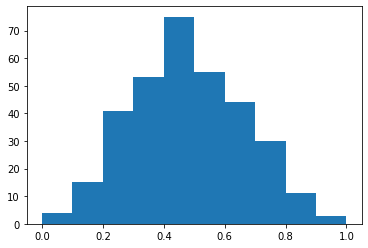

In [10]:
plt.hist(df_scaled_target1['TARGET'])

In [ ]:
# 가장 최근을 뺀 4주 데이터로 만든 타겟

In [11]:
# 웹툰별 4개씩 뽑음
df_set_code = set(df_episode['code_a'])
df_epi_4 = pd.DataFrame()
for code in df_set_code:
    df_epi_4 = pd.concat([df_epi_4,df_episode[df_episode['code_a']==code][-5:-1]])
df_epi_4

df_epi_4 = df_epi_4.astype({'like_tot':'int'}) 

# 웹툰별 아래 3가지 변수에 대한 mean() 구하기
df_episode_4 = df_epi_4[['code_a','like_tot','comments_tot']] 

code_group_4 = df_episode_4.groupby(['code_a'])
code_groupby_4 = code_group_4.agg([np.mean])
code_groupby_4


# groupby 한거 데이터 프레임으로
df_code_group_4 = pd.DataFrame({'like_tot_mean':code_groupby_4['like_tot']['mean'],'comment_tot_mean':code_groupby_4['comments_tot']['mean']})

# 인덱스를 컬럼으로
df_code_group_4['code_a'] = df_code_group_4.index 

# 기존 인덱스 삭제
df_code_group_4.reset_index(drop=True,inplace=True) 
df_code_group_4.rename(columns={'code_a':'code'},inplace=True)


# 표준화할 것
df_merge_4_v2 = df_code_group_4[['like_tot_mean','comment_tot_mean']] 
# log 씌우기
df_merge_4_v2 = log(df_merge_4_v2)


# 학습하기
scaler.fit(df_merge_4_v2)
# min-max scaling 수행
df_scaled_4_v2 = scaler.transform(df_merge_4_v2)

df_scale_mean_4_v2=[]
for i in range(len(df_scaled_4_v2)):
    df_scale_mean_4_v2.append(df_scaled_4_v2[i].mean())
    
    
# 0-1점으로(2개의 피쳐 평균해서)
df_scaled_target2 = pd.DataFrame({'code':df_merge_4['code'],
                                 'past_TARGET':df_scale_mean_4_v2}) 
df_scaled_target2

,code,past_TARGET
0,21815,0.382697
1,64997,0.454216
2,131385,0.571724
3,183559,0.791285
4,318995,0.761408
...,...,...
326,770523,0.727520
327,770590,0.241087
328,771011,0.465796
329,772020,0.521260


(array([ 4., 13., 36., 48., 62., 63., 49., 35., 15.,  6.]),
 array([0.        , 0.09820551, 0.19641102, 0.29461653, 0.39282205,
        0.49102756, 0.58923307, 0.68743858, 0.78564409, 0.8838496 ,
        0.98205511]),
 <a list of 10 Patch objects>)

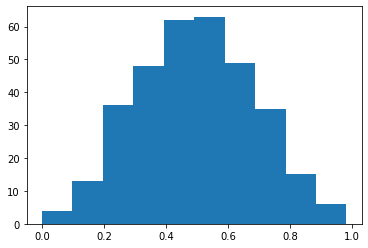

In [12]:
plt.hist(df_scaled_target2['past_TARGET'])

In [13]:
df_targets = pd.merge(df_scaled_target2,df_scaled_target1,on='code')
df_targets

,code,past_TARGET,TARGET
0,21815,0.382697,0.367126
1,64997,0.454216,0.435034
2,131385,0.571724,0.559549
3,183559,0.791285,0.793767
4,318995,0.761408,0.714654
...,...,...,...
326,770523,0.727520,0.725628
327,770590,0.241087,0.233395
328,771011,0.465796,0.452802
329,772020,0.521260,0.518835


## 만든 타겟(인기지수) 시각화

### *네이버 최근 4주동안의 조회순 순위 => rank => 다양한 기준/계산으로 만든 여러개의 rank 버젼

### -> 위에서 만든 인기지수와  rank간의 상관관계 분석


In [14]:
df = pd.read_csv('kw_4_target.csv')
df

,code,like_tot_mean,comment_tot_mean,slope_like_tot,slope_comments_tot,knu_1,knu_2,knu_3,movie_1,movie_2,movie_3,fodo_1,fodo_2,fodo_3,past_TARGET,TARGET
0,21815,1139.25,334.75,-292.6,59.7,-5.500000e-01,-0.100000,0.150,0.262615,-0.050221,0.381174,0.410896,0.455300,0.374057,0.382697,0.367126
1,64997,1368.00,623.50,-527.5,-457.0,-5.500000e-01,0.000000,-0.075,-0.945375,-0.248869,-0.551062,-2.234163,-0.311959,-0.931922,0.454216,0.435034
2,131385,2967.50,1047.00,-364.7,87.9,-3.500000e-01,0.033333,-0.200,0.811336,0.620819,0.018654,-0.687255,0.179533,0.210434,0.571724,0.559549
3,183559,15448.50,2222.75,270.7,392.7,5.000000e-02,-0.100000,0.175,-0.153139,0.205665,0.337194,0.154980,0.311901,0.452176,0.791285,0.793767
4,318995,8778.50,2882.00,18.8,55.5,-3.000000e-01,0.000000,-0.300,0.335007,-0.466822,0.147711,0.620268,0.375041,-0.033704,0.761408,0.714654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,770523,13590.25,1230.00,-16.0,-4.1,6.938894e-18,0.250000,0.100,0.169349,0.373331,0.328548,1.075215,0.370652,0.403835,0.727520,0.725628
327,770590,687.25,113.75,-87.0,-4.9,1.000000e-01,0.150000,-0.125,-0.408002,0.388323,-0.101971,0.458079,0.397336,-0.022675,0.241087,0.233395
328,771011,2263.00,416.75,-40.9,9.2,-1.250000e-01,0.100000,0.000,-0.102010,0.351029,0.356691,0.249034,0.812101,0.596347,0.465796,0.452802
329,772020,5128.25,329.00,-17.4,7.5,-2.500000e-01,-0.075000,0.000,-0.483850,-0.116703,-0.264846,0.309375,-0.299242,0.935445,0.521260,0.518835


In [15]:
df_rank = pd.read_csv('kw_0_list_rank.csv')
df_rank = df_rank.sort_values(by='code')
df_rank

,code,rate,title,author,description,genre_1,genre_2,age,max_ep,rank_week_pop,...,rwp,rwv,rg3p,rg3v,rg10p,rg10v,rank_sum,rank_avg,rank_sum_r,rank_avg_r
16,21815,9.96,히어로메이커,빤쓰,왕은 영웅이 되고 싶어하는 공주의 소원을 들어주기로 전격 결심! 공주를 속이고 마치...,옴니버스,판타지,전체연령가,782,19.000000,...,31,36,5,21,59,107,67,33.5,49,49
249,64997,9.92,나이트런,김성민,우주력 430년. 성간이동이 가능해져 별과 별을 이동하는 시대인간은 괴수와 싸우고 ...,스토리,판타지,15세 이용가,582,14.333333,...,21,10,89,83,52,66,31,15.5,23,23
163,131385,9.96,쿠베라,카레곰,신의 이름을 가진 소녀와 마법사들이 펼쳐나가는소속불명 장르 혼합 판타지,스토리,판타지,전체연령가,515,21.000000,...,35,13,100,73,60,56,48,24.0,33,33
0,183559,9.93,신의 탑,SIU,자신의 모든 것이었던 소녀를 쫓아 탑에 들어온 소년그리고 그런 소년을 시험하는 탑,스토리,판타지,12세 이용가,499,1.000000,...,1,1,1,5,1,2,2,1.0,1,1
193,318995,9.64,갓 오브 하이스쿨,박용제,"전국, 전세계 고등학생 중 가장 쎈 녀석을 뽑는 대회가 열린다.허구 100% 막장 ...",스토리,판타지,12세 이용가,528,2.000000,...,2,2,16,7,8,3,4,2.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,770523,9.97,흑막 여주가 날 새엄마로 만들려고 해,목감기 / 하리힌,친구들과 장난삼아 쓴 '피폐 소설' 속에 시민 1로 빙의했다.그리고 저세상급 딸바보...,스토리,로맨스,전체연령가,17,20.000000,...,33,38,99,126,51,76,71,35.5,52,52
46,770590,9.85,기사님을 지켜줘,달봉,첫눈에 반한 남학생을 떠올리며 언니의 피규어 '브릭'에게 뽀뽀 연습을 하는 '예은'...,스토리,판타지,전체연령가,16,60.000000,...,129,133,282,300,173,241,262,131.0,180,180
236,771011,9.97,"찬란하지 않아도 괜찮아, 새벽",까마중,"대학 졸업 후 3년, 스물일곱이 된 '찬란'. 문화기자로 활동하며 오랜 연인 '도래...",에피소드,드라마,전체연령가,19,62.666667,...,134,141,38,53,147,262,275,137.5,189,189
215,772020,9.95,로판 빙의 만화,싱난다,읽던 소설 속 주인공이 된 고등학생 영희는 미래의 황후가 될 자신이 없어서 초장부터...,스토리,로맨스,전체연령가,17,38.333333,...,77,76,161,187,95,124,153,76.5,110,110


In [16]:
df_rank1 = df_rank[['code','rank_week_pop', 'rank_week_view', 'rank_gen3_pop',
       'rank_gen3_view', 'rank_gen10_pop', 'rank_gen10_view', 'rwp', 'rwv',
       'rg3p', 'rg3v', 'rg10p', 'rg10v', 'rank_sum', 'rank_avg', 'rank_sum_r',
       'rank_avg_r']]
df1 = df[['code','TARGET']]

df_merge = pd.merge(df_rank1,df1,on='code')
df_merge

,code,rank_week_pop,rank_week_view,rank_gen3_pop,rank_gen3_view,rank_gen10_pop,rank_gen10_view,rwp,rwv,rg3p,rg3v,rg10p,rg10v,rank_sum,rank_avg,rank_sum_r,rank_avg_r,TARGET
0,21815,19.000000,17.000000,5.000000,63.000000,30.000000,105.666667,31,36,5,21,59,107,67,33.5,49,49,0.367126
1,64997,14.333333,5.333333,101.000000,285.333333,27.000000,70.666667,21,10,89,83,52,66,31,15.5,23,23,0.435034
2,131385,21.000000,7.000000,118.666667,250.666667,31.000000,62.000000,35,13,100,73,60,56,48,24.0,33,33,0.559549
3,183559,1.000000,1.000000,1.000000,10.000000,1.000000,2.000000,1,1,1,5,1,2,2,1.0,1,1,0.793767
4,318995,2.000000,2.000000,11.333333,16.333333,4.000000,3.000000,2,2,16,7,8,3,4,2.0,3,3,0.714654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,770523,20.000000,18.000000,117.000000,493.333333,26.000000,79.333333,33,38,99,126,51,76,71,35.5,52,52,0.725628
327,770590,60.000000,60.000000,405.333333,1019.000000,98.666667,236.000000,129,133,282,300,173,241,262,131.0,180,180,0.233395
328,771011,62.666667,63.666667,29.666667,148.666667,82.333333,283.666667,134,141,38,53,147,262,275,137.5,189,189,0.452802
329,772020,38.333333,35.000000,213.000000,672.666667,49.666667,122.000000,77,76,161,187,95,124,153,76.5,110,110,0.518835


In [17]:
corr = df_merge.corr()

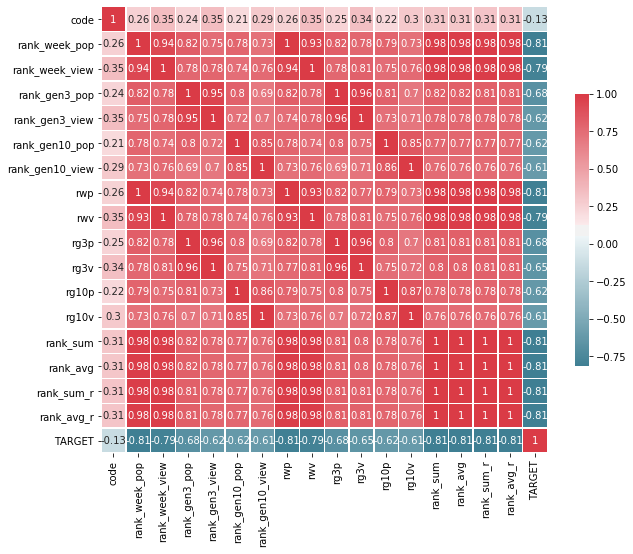

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, annot=True, square=True, linewidths=.5, cbar_kws={'shrink': .5})

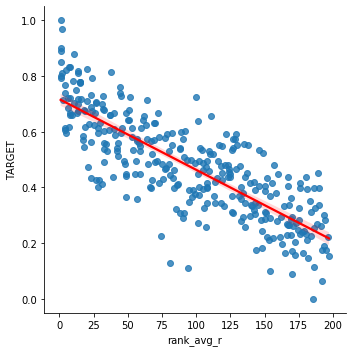

In [20]:
sns.lmplot(x='rank_avg_r',y='TARGET',data=df_merge,line_kws={'color':'red'})